In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de distribución para cada variable numérica
import matplotlib.ticker as ticker
# ==============================================================================
# Identificador de tipos de Distribucion
# ==============================================================================
from fitter import Fitter, get_common_distributions
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
#Limpiar datos
datos = datos.fillna(0)

# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)
    
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

Primera Linea para llegar al final del Ejercicio

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
datos.head(10)  # Select top 10 

In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

In [ ]:
# Dimensiones del dataset (registros, Columnas)
# ==============================================================================
datos.shape

In [ ]:
# Número de datos ausentes por variable
# datos.isna() devuelve valores false and true (si esta vacio)
# datos.isna().sum() Sumamos el conteo true
# datos.isna().sum().sort_values() Ordenamos de acuerdo a los valores
# ==============================================================================
datos.isna().sum().sort_values()

In [ ]:
#Limpiar datos
datos = datos.fillna(0) # a los valores nullos se le coloca 0 

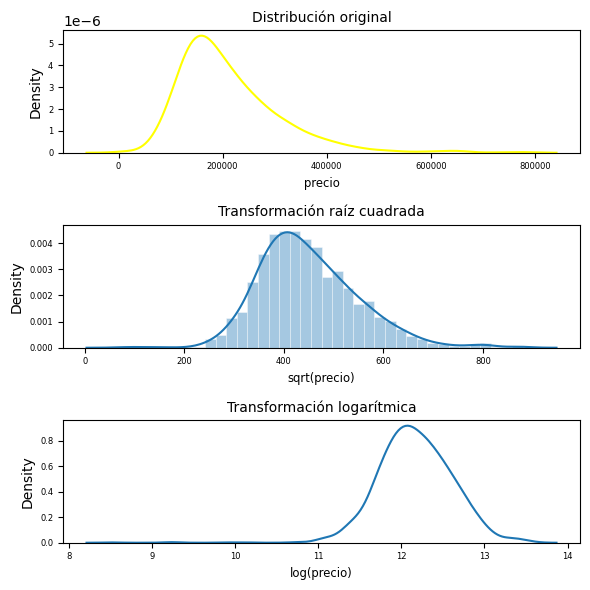

In [2]:
# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# ==============================================================================
# Tratamiento de datos
# ==============================================================================
import numpy as np
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos.precio,
    # hist=False,
    # rug     = True,
    color='yellow',
    # kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.histplot(
    np.sqrt(datos.precio),
    kde=True, # linea de 
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(datos.precio),
    # alpha=.4, 
    # rug=True,
    # color   = "blue",
    # kde_kws = {'shade': False, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [4]:
# Identificador de tipos de Distribucion
# ==============================================================================
from fitter import Fitter, get_common_distributions
# ==============================================================================

distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 14.22it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,-55037.908642,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,-53883.297844,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,-53778.388707,inf,0.121728,9.001774e-23
chi2,5.835610e-11,3315.562140,-53578.774007,inf,0.094392,7.513341e-14
norm,6.947514e-11,3324.534158,-53284.856663,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,-50806.577128,inf,0.316530,2.028906e-154
powerlaw,3.078034e-10,2741.669837,-50705.287086,inf,0.384832,9.418212e-231
exponpow,4.841645e-10,inf,-49922.566370,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,-49922.566370,3.958212,0.947917,0.000000e+00


In [5]:
# Variables numéricas / cuantitativas
# ==============================================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.500000,12.000000


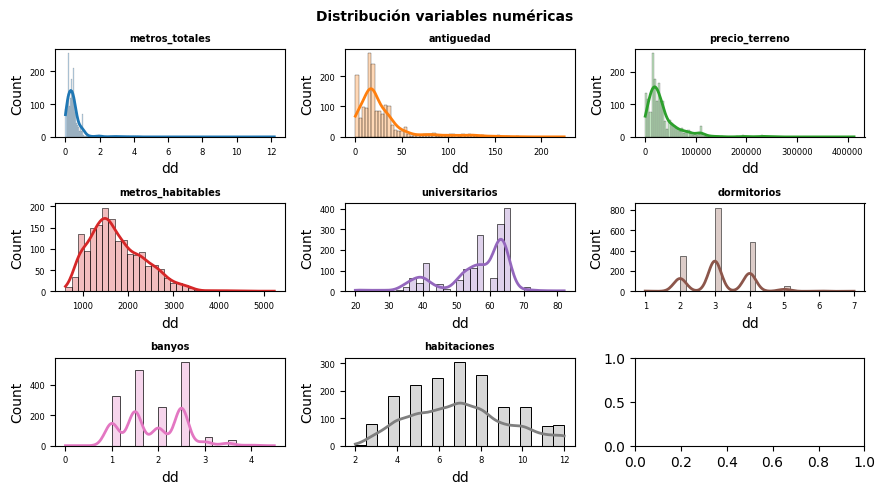

In [3]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum, # dato a calcular
        stat    = "count", # medida a calcular
        kde     = True, # habilitar linea del histograma
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], # formato de colores
        line_kws= {'linewidth': 2}, # grosor de las lineas del histograma
        alpha   = 0.3, # contraste de la barras del histogrma 
        ax      = axes[i] # posicion de la figura en la hoja
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold") # titulo de la figura
    axes[i].tick_params(labelsize = 6) # tamaño de letra del eje Y
    axes[i].set_xlabel("dd") # nombre del eje x 
    
    
fig.tight_layout() # extension de la hoja por la extension del espacio
plt.subplots_adjust(top = 0.9) # ajuste de figura respecto a la parte superior de la hoja
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");# titulo de la hoja

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y 
la gran mayoría de observaciones pertenecen a solo dos de ellos. 
En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea.value_counts()

In [ ]:
# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

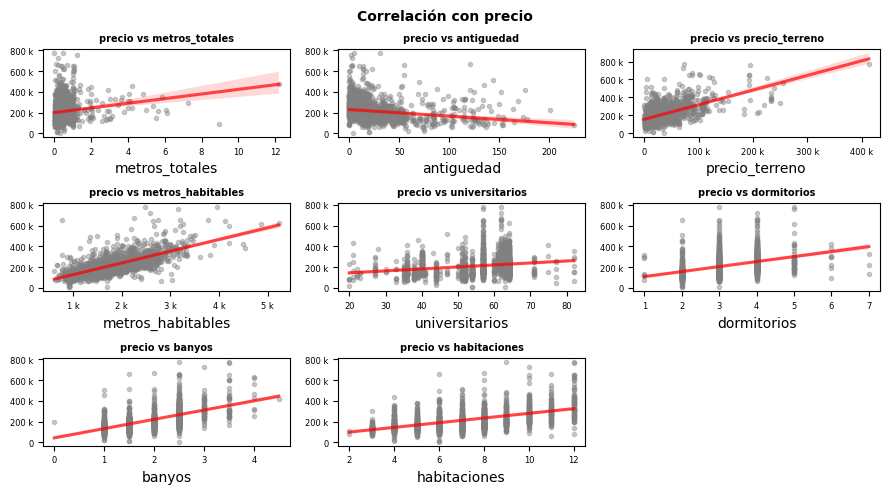

In [6]:
# Gráfico de distribución para cada variable numérica
import matplotlib.ticker as ticker
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.', # forma del punto en la figura 
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel(colum)
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

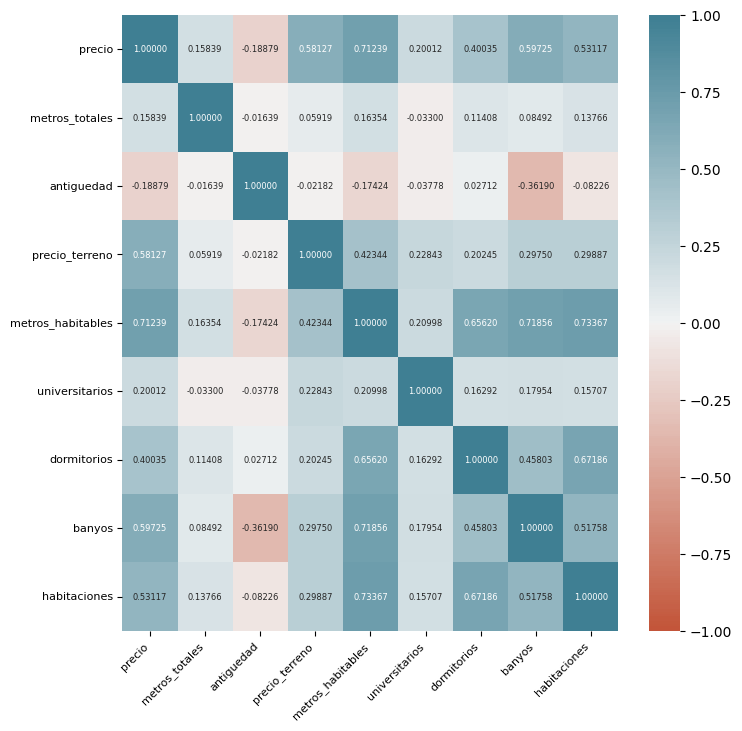

In [2]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8)) # numero de graficos y tamaño de los graficos

sns.heatmap(
    corr_matrix,
    annot     = True, # indica valores en cada cuadro
    cbar      = True, # barra de medicion para la comparacion entre -1 a 1
    annot_kws = {"size": 6}, # tamaño de letra del valor de la correlacion
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = False,
    fmt       = '.5f', # numero de decimales
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45, # angulo de inclinacion de los ejes
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)